**Import Library**

In [178]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

**Data Understanding**

In [179]:
dataset = pd.read_csv('./lang_scores.csv')
dataset

,Unnamed: 0,Reading,Listening,Speaking,Writing,LangLevel
0,0,0.15,0.38,0.22,0.24,1
1,1,0.06,0.06,0.02,0.35,1
2,2,0.24,0.28,0.01,0.39,1
3,3,0.33,0.08,0.05,0.07,1
4,4,0.12,0.21,0.13,0.12,1
...,...,...,...,...,...,...
295,295,0.99,0.87,0.93,0.99,3
296,296,0.82,0.99,0.94,0.81,3
297,297,0.86,0.94,0.81,0.92,3
298,298,0.87,0.92,0.81,0.97,3


In [180]:
dataset.drop('LangLevel', axis = 1, inplace = True)
dataset.drop('Unnamed: 0', axis = 1, inplace = True)
dataset

,Reading,Listening,Speaking,Writing
0,0.15,0.38,0.22,0.24
1,0.06,0.06,0.02,0.35
2,0.24,0.28,0.01,0.39
3,0.33,0.08,0.05,0.07
4,0.12,0.21,0.13,0.12
...,...,...,...,...
295,0.99,0.87,0.93,0.99
296,0.82,0.99,0.94,0.81
297,0.86,0.94,0.81,0.92
298,0.87,0.92,0.81,0.97


In [181]:
dataset.describe()

,Reading,Listening,Speaking,Writing
count,300.000000,300.000000,300.000000,300.000000
mean,0.505433,0.512200,0.465733,0.519967
std,0.275526,0.275298,0.280242,0.277404
min,0.000000,0.000000,0.010000,0.010000
25%,0.310000,0.287500,0.220000,0.297500
50%,0.525000,0.520000,0.440000,0.570000
75%,0.730000,0.750000,0.690000,0.742500
max,1.000000,0.990000,0.990000,1.000000


In [182]:
dataset.isnull().sum()

Reading      0
Listening    0
Speaking     0
Writing      0
dtype: int64

In [183]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(dataset))
dataset

MinMaxScaler()


,Reading,Listening,Speaking,Writing
0,0.15,0.38,0.22,0.24
1,0.06,0.06,0.02,0.35
2,0.24,0.28,0.01,0.39
3,0.33,0.08,0.05,0.07
4,0.12,0.21,0.13,0.12
...,...,...,...,...
295,0.99,0.87,0.93,0.99
296,0.82,0.99,0.94,0.81
297,0.86,0.94,0.81,0.92
298,0.87,0.92,0.81,0.97


**Modelling**

c:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


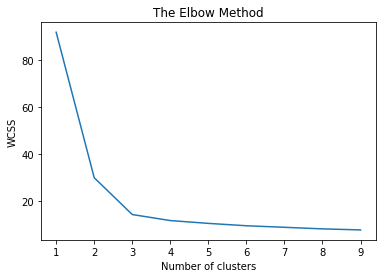

In [184]:
from sklearn.cluster import KMeans
wcss=[]

# asumsi jumlah K berada di antara 1 sampai 10
for i in range(1,10):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [185]:
from sklearn.cluster import KMeans

# menentukan jumlah cluster
kmeans = KMeans(n_clusters=3)

# fitting input data
kmeans = kmeans.fit(dataset)

# mendapatkan cluster labels
labels = kmeans.predict(dataset)

# mendapatkan nilai centroid
centroids = kmeans.cluster_centers_

In [186]:
centroids

array([[0.484     , 0.504     , 0.43011765, 0.52694118],
       [0.1992    , 0.197     , 0.1495    , 0.1952    ],
       [0.78756522, 0.79234783, 0.76704348, 0.79721739]])

In [187]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(dataset)
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [188]:
pred = y_kmeans
dataset['Cluster'] = pred

In [189]:
# jumlah anggota masing-masing cluster
dataset['Cluster'].value_counts()

1    115
2    100
0     85
Name: Cluster, dtype: int64

In [190]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(dataset, labels)

0.7759108803716004

**Visualization**

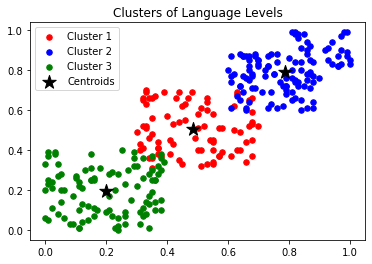

In [191]:
#Visualizing all the clusters 
dataset = dataset.values
plt.scatter(dataset[pred == 0, 0], dataset[pred == 0, 1], s = 30, c = 'red', label = 'Cluster 1')
plt.scatter(dataset[pred == 1, 0], dataset[pred == 1, 1], s = 30, c = 'blue', label = 'Cluster 2')
plt.scatter(dataset[pred == 2, 0], dataset[pred == 2, 1], s = 30, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', label='Centroids',marker = '*')
plt.title('Clusters of Language Levels')
plt.legend()
plt.show()

In [192]:
# Serializing the model
import pickle
pickle.dump(kmeans, open('model.pkl', 'wb'))